In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import t

In [20]:
T1 = [[562, 1827, 1144, 828, 63]]
T2 = [[1363, 3596, 2100, 1247, 3279]]

OF1 = [[105.56, 133.86, 118.36, 124.32, 135.68]]
OF2 = [[108.06, 133.86, 122.36, 123.06, 136.68]]

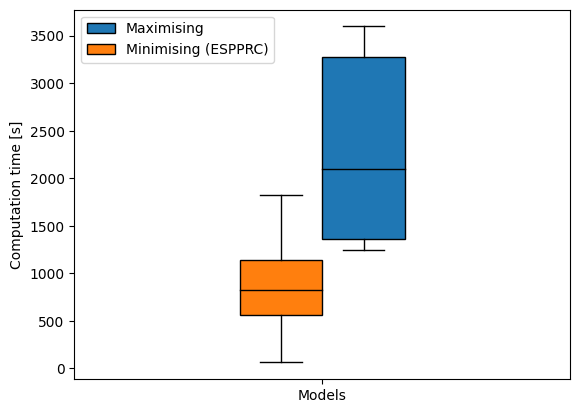

In [21]:
### Codigo obtenido ChatGPT


from scipy.stats import t
# Two lists of vectors
data1 = T2
data2 = T1

# Compute the means and standard errors
means1 = [np.mean(x) for x in data1]
se1 = [np.std(x, ddof=1)/np.sqrt(len(x)) for x in data1]
means2 = [np.mean(x) for x in data2]
se2 = [np.std(x, ddof=1)/np.sqrt(len(x)) for x in data2]

# Compute the t-value for a 95% confidence interval
alpha = 0.05
df1 = len(data1[0])-1
t_val1 = t.ppf(1-alpha/2, df1)
df2 = len(data2[0])-1
t_val2 = t.ppf(1-alpha/2, df2)

# Compute the confidence intervals
ci1_lower = [m - t_val1*se for m, se in zip(means1, se1)]
ci1_upper = [m + t_val1*se for m, se in zip(means1, se1)]
ci2_lower = [m - t_val2*se for m, se in zip(means2, se2)]
ci2_upper = [m + t_val2*se for m, se in zip(means2, se2)]

# Plot the boxplots
fig, ax = plt.subplots()
bp1 = ax.boxplot(data1, positions=np.arange(len(data1))+0.1, widths=0.2, patch_artist=True, boxprops=dict(facecolor="C0"), medianprops=dict(color="black"))
bp2 = ax.boxplot(data2, positions=np.arange(len(data2))-0.1, widths=0.2, patch_artist=True, boxprops=dict(facecolor="C1"), medianprops=dict(color="black"))


# Set the axis labels and legend
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Models' for i in range((len(data1)))])
ax.set_ylabel("Computation time [s]")
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ["Maximising", "Minimising (ESPPRC)"])

plt.show()

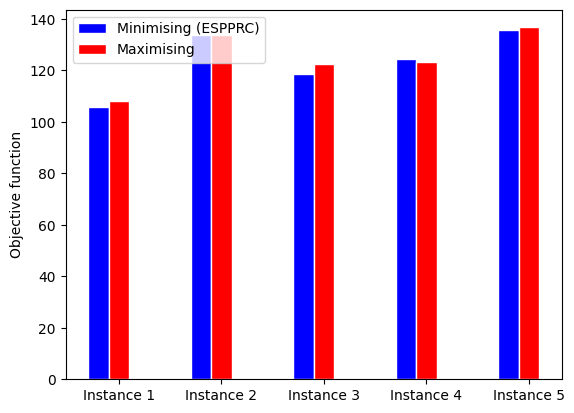

In [32]:
### Codigo obtenido ChatGPT



import matplotlib.pyplot as plt
import numpy as np

# Create sample data
list1 = OF1
list2 = OF2
labels = ['Instance 1', 'Instance 2', 'Instance 3', 'Instance 4', 'Instance 5']

# Select elements to compare
compare_element = 0  # compare first element of list1 to first element of list2

# Set width of each bar
barWidth = 0.2

# Set x position of each bar
r1 = np.arange(len(list1[compare_element]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create barplots for the selected elements
plt.bar(r1, list1[compare_element], color='blue', width=barWidth, edgecolor='white', label='Minimising (ESPPRC)')
plt.bar(r2, list2[compare_element], color='red', width=barWidth, edgecolor='white', label='Maximising')
#plt.bar(r3, np.subtract(list1[compare_element], list2[compare_element]), color='green', width=barWidth, edgecolor='white', label='Diferencia')

# Add xticks on the middle of the group bars
#plt.xlabel('Instancias', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(list1[compare_element]))], labels)

plt.ylabel('Objective function')


# Add legend
plt.legend()

# Show graphic
plt.show()
